In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('data/summary_data/clear2017.csv',index_col=0)

In [3]:
print(f'Таблица с данными за 2017 год с очищенными от корреляции признаками')
display(data)

Таблица с данными за 2017 год с очищенными от корреляции признаками


,Region,child_mortality_rural,poverty_percent,welfare_expense_share,cash_income_2017,population,gross_regional_product,regional_production,retail_turnover_per_capita,alco,drugs
0,Республика Адыгея,16.0,13.0,24.4,26478.0,453366.0,241997.3,1.094333e+08,190240,61.5,4.9
1,Республика Алтай,26.0,25.4,20.6,18584.0,217007.0,222562.9,2.353276e+07,112034,70.8,5.5
2,Республика Башкортостан,158.0,12.3,22.9,28468.0,4066972.0,366013.2,2.924975e+09,206913,61.9,5.6
3,Республика Бурятия,41.0,19.0,25.0,23860.0,984134.0,228171.1,2.257900e+08,173586,40.8,3.3
4,Республика Дагестан,295.0,14.5,27.3,26483.0,3041900.0,209477.8,1.348438e+08,203361,16.1,10.1
...,...,...,...,...,...,...,...,...,...,...,...
78,Еврейская АО,9.0,24.3,28.3,23679.0,164217.0,338826.6,3.798325e+07,138444,118.9,73.0
79,Ненецкий АО,0.0,10.6,16.9,73013.0,43937.0,6045235.6,5.872056e+08,214927,120.5,0.0
80,Ханты-Мансийский АО - Югра,15.0,9.5,16.5,48834.0,1646078.0,2155227.7,7.512039e+09,239076,50.2,12.0
81,Чукотский АО,5.0,8.5,7.8,73019.0,49822.0,1469675.0,1.488479e+08,183781,254.1,2.0


Уберем малоинформативные признаки alco и drugs

In [4]:
data.drop(['alco','drugs'],axis=1,inplace=True)

In [5]:
scaler = MinMaxScaler()
X = data.drop(['Region'],axis=1)
scaler.fit(X)
Reg = pd.DataFrame(data['Region'])
col_names = X.columns
scaler_data = Reg.join(pd.DataFrame(scaler.transform(X),columns=col_names))

In [6]:
X = scaler_data.drop(['Region'],axis=1)

Попробуем построить модель GMM кластеризации с тремя кластерами

In [7]:
gm_clustering = GaussianMixture(n_components=3, random_state=42)
gm_clustering.fit(X)

gm_prediction = gm_clustering.predict(X)

In [8]:
scaler_data['prediction'] = gm_prediction

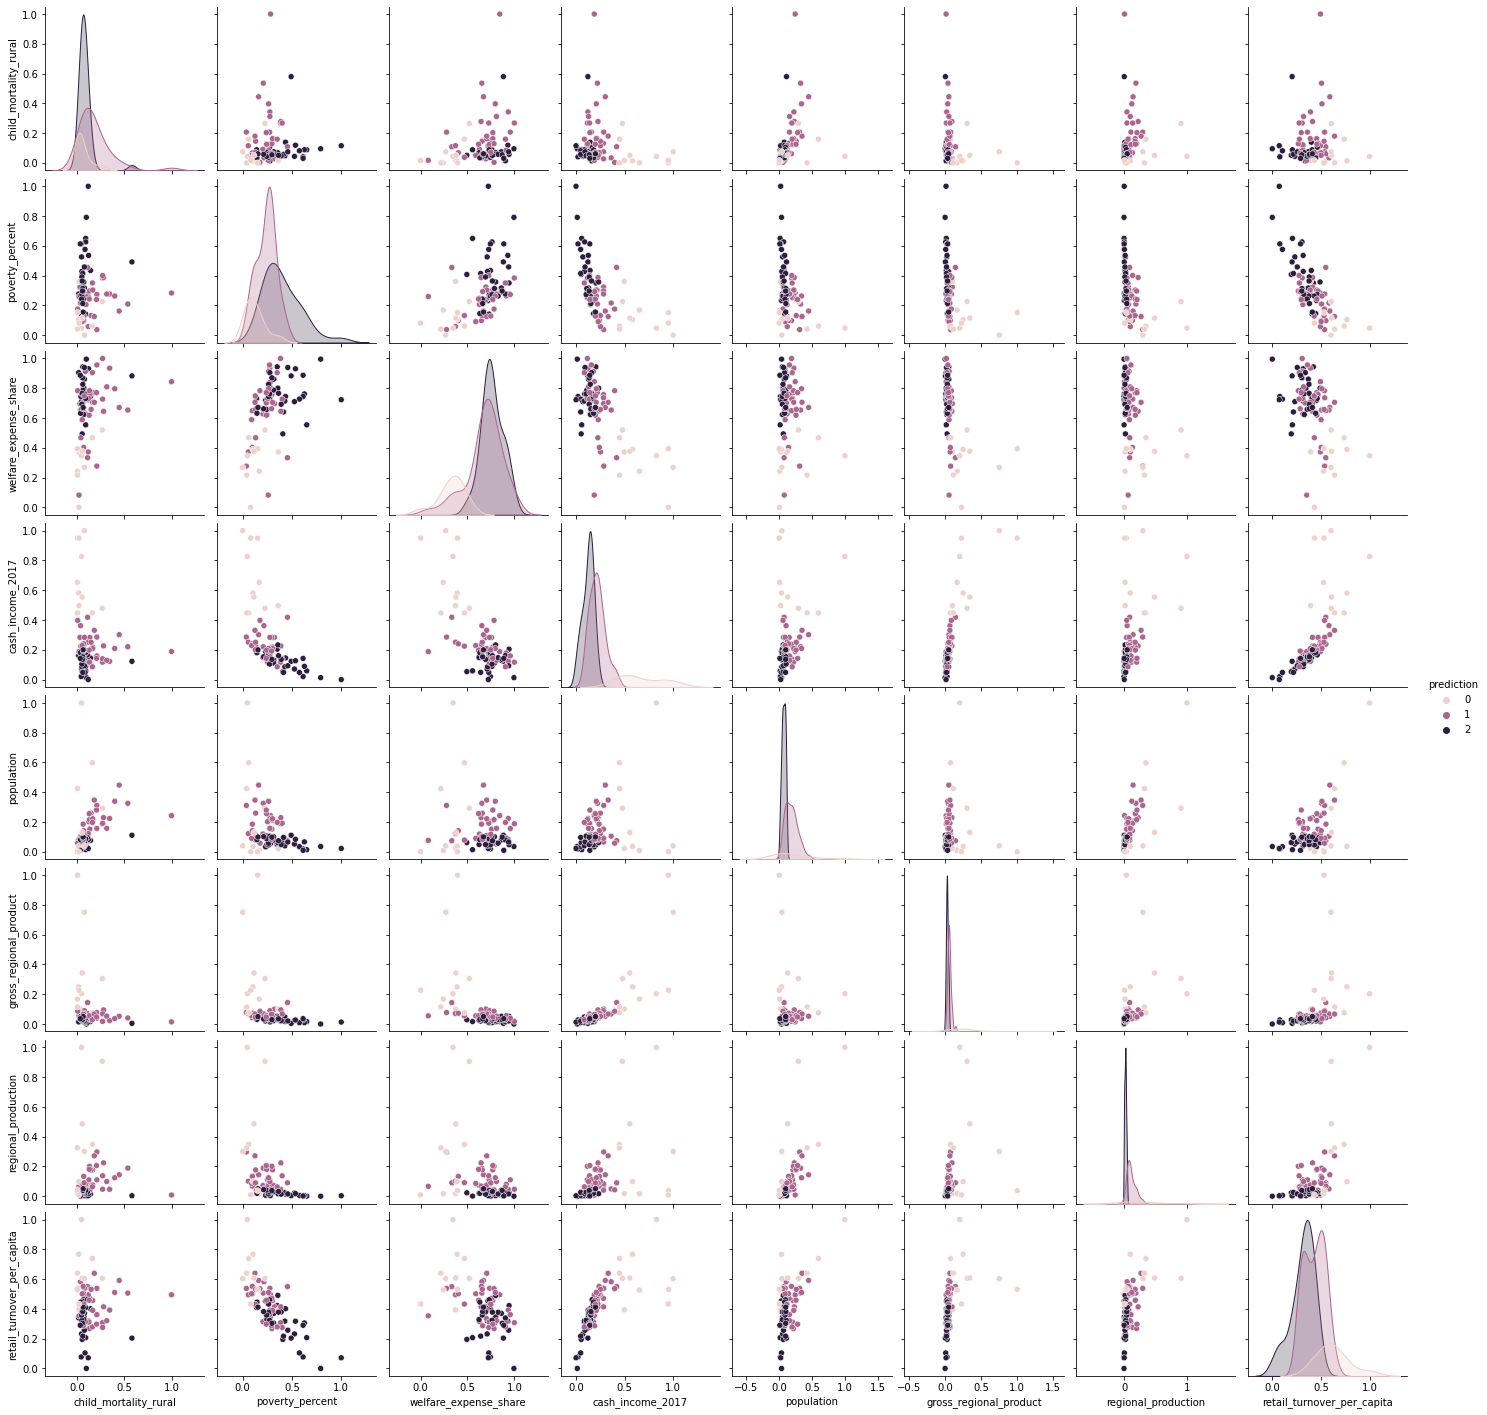

In [9]:
sns.pairplot(scaler_data,hue='prediction')

In [10]:
scaler_data.groupby('prediction',as_index=False).median()

,prediction,child_mortality_rural,poverty_percent,welfare_expense_share,cash_income_2017,population,gross_regional_product,regional_production,retail_turnover_per_capita
0,0,0.016949,0.104377,0.372294,0.581667,0.039890,0.227045,0.300984,0.605619
1,1,0.128814,0.259259,0.705628,0.208634,0.185744,0.054958,0.090229,0.432544
2,2,0.057627,0.356902,0.744589,0.135587,0.065672,0.026303,0.020340,0.328943


In [11]:
scaler_data['prediction'].value_counts()

1    37
2    35
0    11
Name: prediction, dtype: int64

Получили три кластера с прямыми зависимости всех признаков с кластерами, кроме child_mortality_rural и population

Так же как и KMean, GMM модель склона выделять большое кол-во регионов в кластер с "минимальным" благополучием, и, при увелечении кол-ва кластеров, делит другие кластеры.

Возьмем кластер с худшим благоустройством, и попробуем разбить его еще на 3 кластера.

In [12]:
bad_regions_data = scaler_data[scaler_data['prediction']==2].reset_index()
bad_regions_data.drop(['index','prediction'],axis=1,inplace=True)

In [13]:
X = bad_regions_data.drop(['Region'],axis=1)

In [14]:
gm_clustering = GaussianMixture(n_components=3, random_state=42)
gm_clustering.fit(X)

gm_prediction = gm_clustering.predict(X)

In [15]:
bad_regions_data['prediction'] = gm_prediction

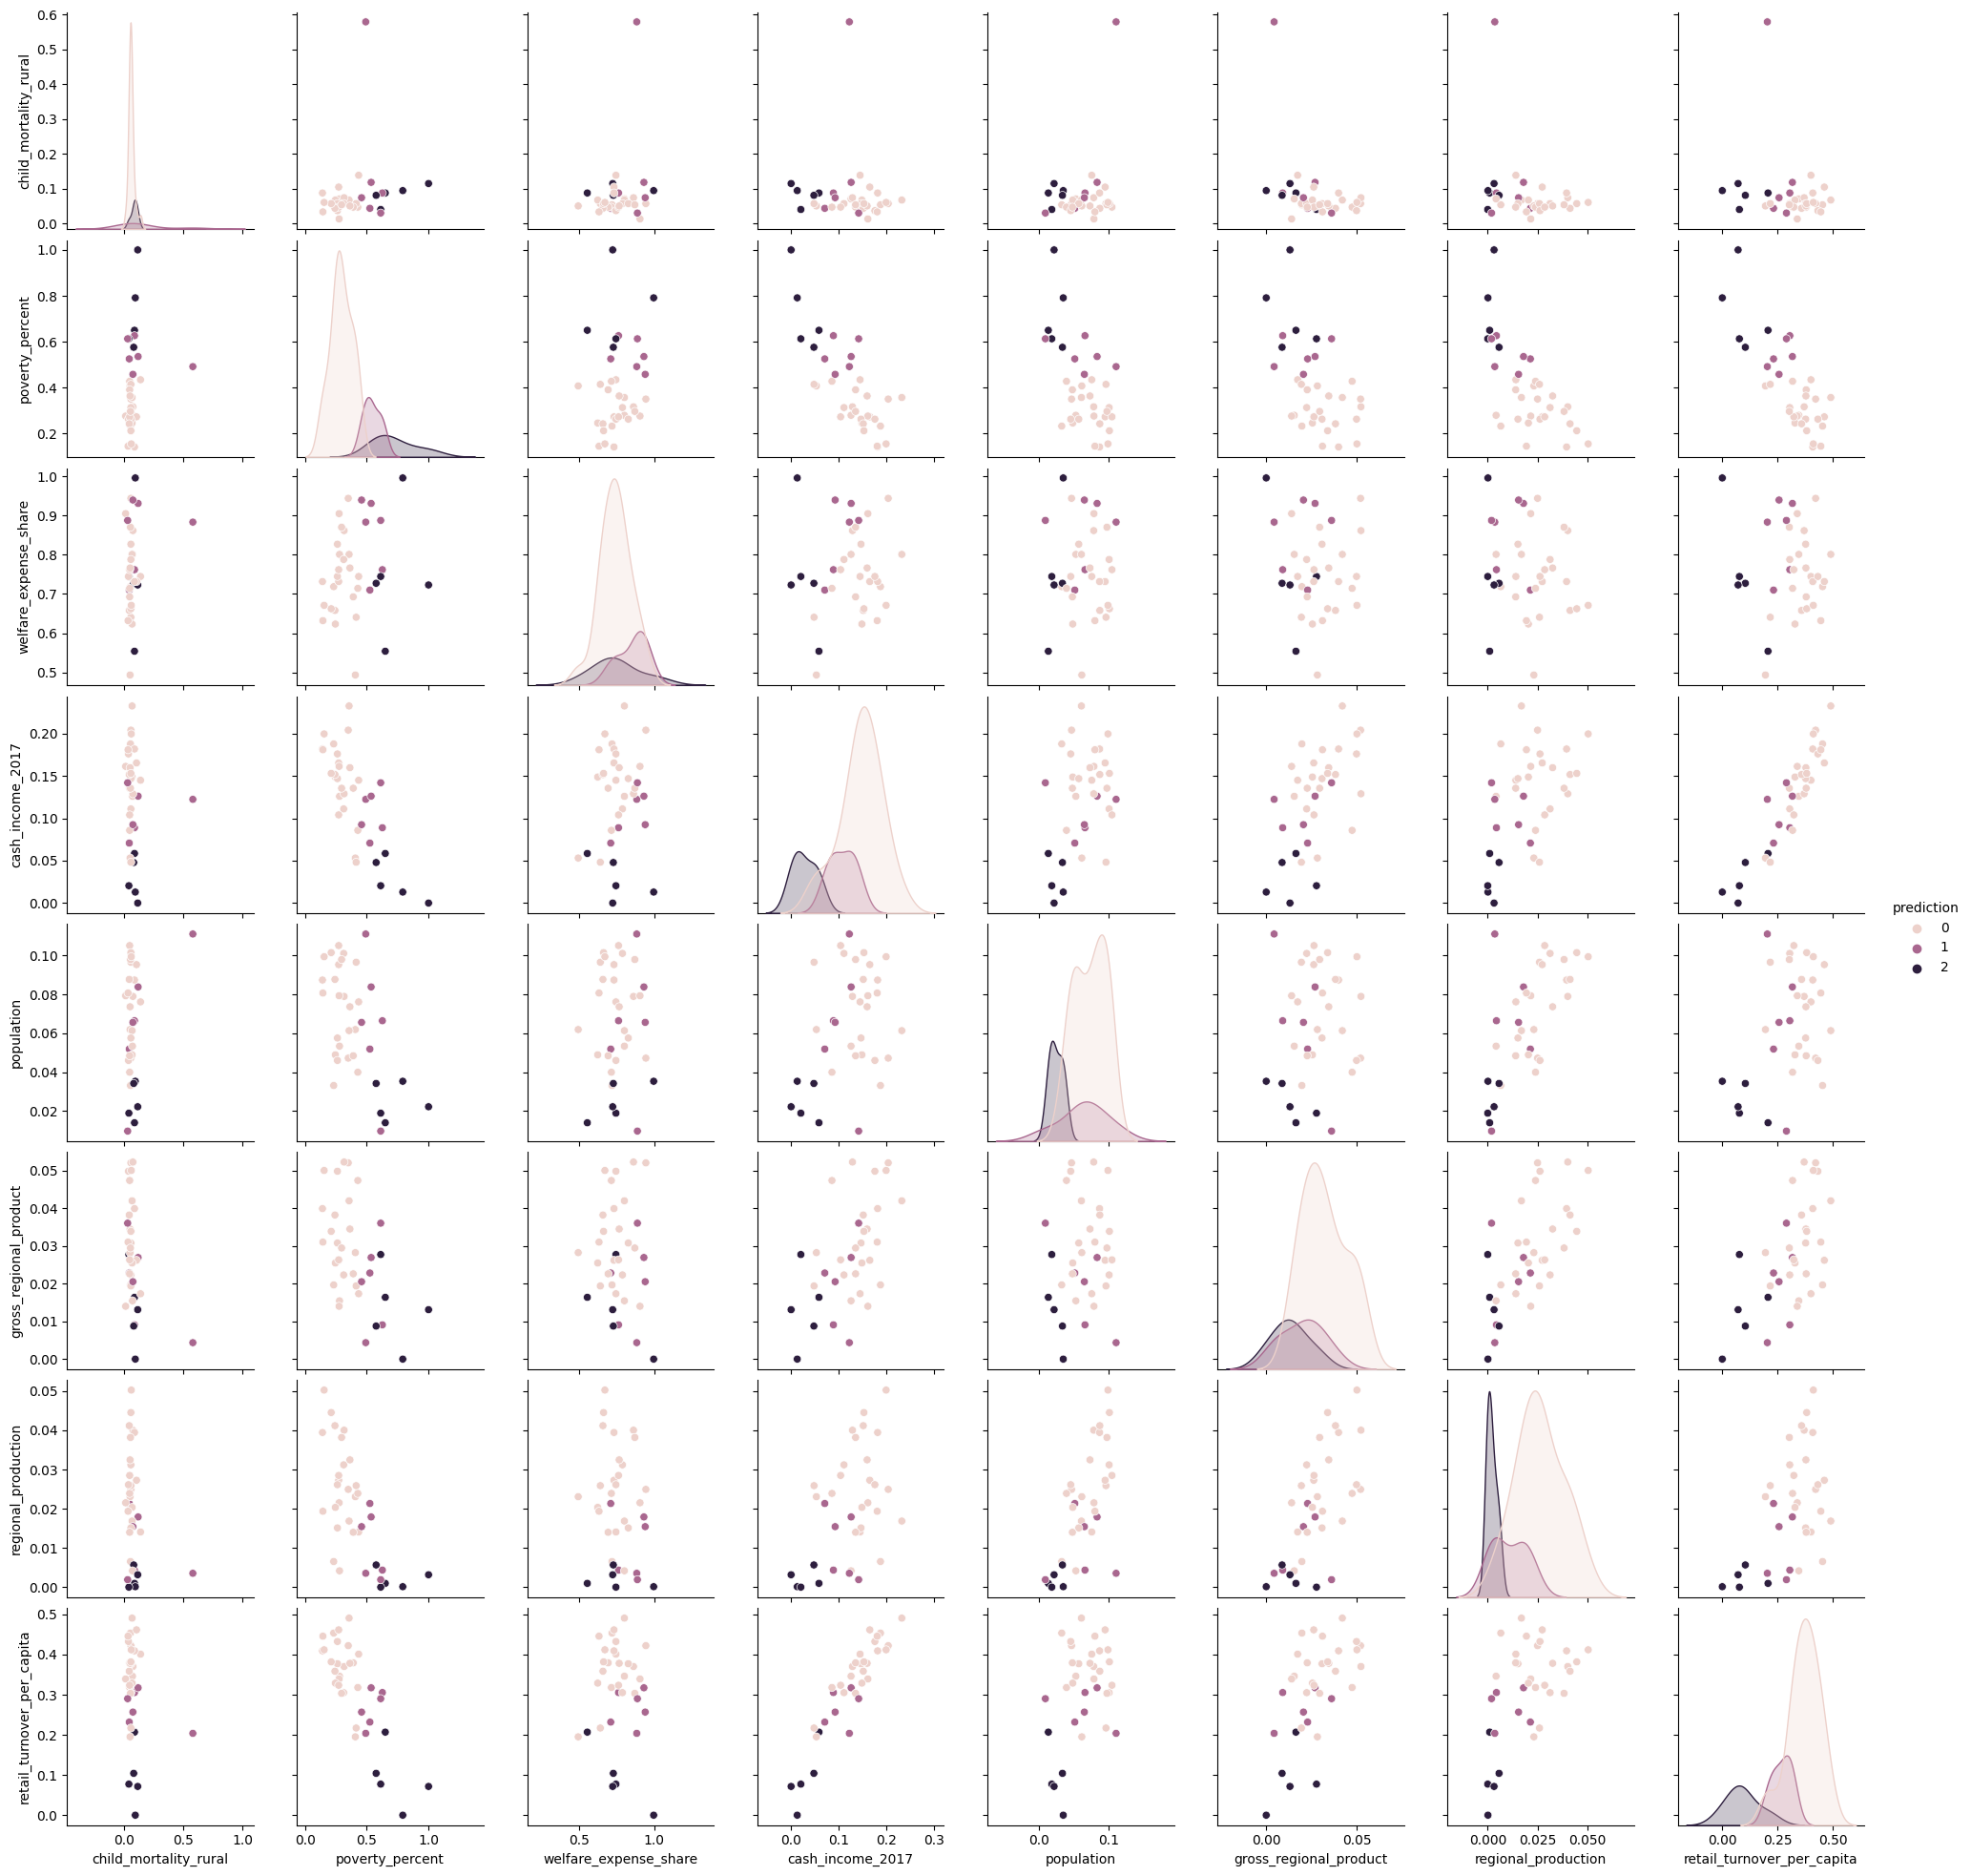

In [16]:
sns.pairplot(bad_regions_data,hue='prediction')

In [17]:
bad_regions_data.groupby('prediction',as_index=False).median()

,prediction,child_mortality_rural,poverty_percent,welfare_expense_share,cash_income_2017,population,gross_regional_product,regional_production,retail_turnover_per_capita
0,0,0.057627,0.277778,0.738095,0.150313,0.077619,0.030097,0.025407,0.377759
1,1,0.081356,0.530303,0.885281,0.107529,0.066091,0.021662,0.009889,0.273533
2,2,0.088136,0.649832,0.727273,0.020486,0.022260,0.013091,0.000967,0.077336


In [18]:
bad_regions_data['prediction'].value_counts()

0    24
1     6
2     5
Name: prediction, dtype: int64

In [19]:
print(f"По результатам данной модели получаем список 5 самых остро нуждающихся в финансовой помощи регионов в 2017г: \n{list(bad_regions_data[bad_regions_data['prediction'] == 2]['Region'])}\n \
и следующих за ними:\n {list(bad_regions_data[bad_regions_data['prediction'] == 1]['Region'])}")

По результатам данной модели получаем список 5 самых остро нуждающихся в финансовой помощи регионов в 2017г: 
['Республика Алтай', 'Республика Ингушетия', 'Республика Калмыкия', 'Карачаево-Черкесская Республика', 'Республика Тыва']
 и следующих за ними:
 ['Кабардино-Балкарская Республика', 'Республика Марий Эл', 'Чеченская Республика', 'Забайкальский край', 'Курганская область', 'Еврейская АО']


В целом, по анализу данных моделей кластеризации и прошлого примения KMeans получаем тендеции интересующих нас регионов: \
Высокий % людей за чертой бедности (poverty_percent) \
Высокие расходы на социальную политику (welfare_expense_share) \
Низкий среднедушевный доход населения (cash_income) \
Низкий валовый продукт (gross_regional_product) \
Низкий объем товаров/услуг (regional_production) \
Низкий оборот розничной торговли (retail_turnover_per_capita)